In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import matthews_corrcoef, confusion_matrix, make_scorer
import seaborn as sns

In [2]:
df_num_n40 = pd.read_csv('dataset/train_numerical_n40.csv')

In [3]:
df_num_n40

,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F10,L0_S0_F22,L0_S1_F28,L3_S29_F3333,L3_S29_F3339,L3_S29_F3342,...,L3_S33_F3855,L3_S33_F3857,L3_S33_F3859,L3_S33_F3865,L3_S33_F3867,L3_S33_F3871,L3_S33_F3873,L3_S34_F3880,L3_S34_F3882,Response
0,0.030,-0.034,-0.197,-0.179,0.116,-0.273,0.167,0.044,0.010,0.041,...,-0.119,-0.102,-0.048,0.026,0.0,0.0,0.0,0.0,0.0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006,-0.064,-0.031,...,-0.029,-0.026,-0.210,-0.047,0.0,0.0,0.0,0.0,0.0,0
2,0.088,0.086,0.003,-0.052,0.025,0.250,-0.079,0.006,0.040,-0.005,...,0.199,0.191,0.236,0.108,0.0,0.0,0.0,0.0,0.0,0
3,-0.036,-0.064,0.294,0.330,0.161,-0.253,-0.007,0.038,0.014,0.020,...,0.017,0.031,0.165,0.035,0.0,0.0,0.0,0.0,0.0,0
4,-0.055,-0.086,0.294,0.330,0.025,0.042,-0.046,-0.163,0.053,0.033,...,-0.074,-0.049,0.147,-0.006,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,-0.023,0.033,-0.015,-0.016,0.070,0.159,-0.056,0.013,-0.116,-0.081,...,-0.119,-0.095,0.152,0.035,0.0,0.0,0.0,0.0,0.0,0
1183743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025,-0.025,-0.017,...,-0.210,-0.184,-0.139,0.075,0.0,0.0,0.0,0.0,0.0,0
1183744,0.075,0.123,-0.343,-0.325,0.161,0.046,-0.103,0.025,-0.064,-0.031,...,0.017,0.019,-0.114,-0.177,0.0,0.0,0.0,0.0,0.0,0
1183745,-0.062,-0.019,-0.179,-0.179,0.116,0.156,-0.045,-0.056,0.131,0.109,...,0.062,0.072,0.031,0.083,0.0,0.0,0.0,0.0,0.0,0


In [9]:
df_response = df_num_n40['Response']

In [4]:
df_fe_num = pd.read_csv('dataset/feature_engineering_numerical.csv')

In [6]:
df_fe_num

,Id,L2_max,L2_min,L2_mean,L0_max,L0_min,L0_mean,L3_max,L3_min,L3_mean,...,S0_max,S0_min,S0_mean,S30_max,S30_min,S30_mean,S18_max,S18_min,S18_mean,Response
0,4,NaN,NaN,NaN,0.260,-0.273,-0.045488,0.520,-0.702,-0.010580,...,0.118,-0.273,-0.053000,0.275,-0.177,0.003889,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,0.315,-0.324,-0.003222,0.255,-0.480,0.004054,...,NaN,NaN,NaN,0.255,-0.143,0.018441,0.315,-0.046,0.086333,0
2,7,NaN,NaN,NaN,0.506,-0.336,-0.000535,0.238,-0.480,-0.000728,...,0.250,-0.225,0.029333,0.134,-0.221,-0.009000,NaN,NaN,NaN,0
3,9,NaN,NaN,NaN,0.402,-0.253,0.024558,0.218,-0.480,-0.008020,...,0.330,-0.253,0.027583,0.164,-0.173,0.008544,NaN,NaN,NaN,0
4,11,NaN,NaN,NaN,0.330,-0.298,-0.003512,0.520,-0.347,-0.008857,...,0.330,-0.169,0.053333,0.137,-0.186,-0.003471,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,0.199,-0.297,-0.064857,0.273,-0.311,0.000674,0.321,-0.480,0.007966,...,0.178,-0.032,0.052750,0.321,-0.168,0.021824,NaN,NaN,NaN,0
1183743,2367491,NaN,NaN,NaN,0.434,-0.307,0.011178,0.520,-0.255,-0.011048,...,NaN,NaN,NaN,0.286,-0.130,-0.006294,NaN,NaN,NaN,0
1183744,2367492,NaN,NaN,NaN,0.343,-0.343,-0.018070,0.352,-0.480,0.000784,...,0.214,-0.343,-0.015250,0.352,-0.180,0.009324,NaN,NaN,NaN,0
1183745,2367493,NaN,NaN,NaN,0.455,-0.256,-0.005698,0.520,-0.222,-0.000946,...,0.275,-0.179,0.009750,0.154,-0.188,-0.024765,NaN,NaN,NaN,0


In [10]:
df_id = df_fe_num['Id']

In [5]:
df_fe_date = pd.read_csv('dataset/feature_engineering_date.csv')

In [7]:
df_fe_date

,Id,L1_first,L1_last,L1_duration,L3_first,L3_last,L3_duration,L0_first,L0_last,L0_duration,...,S48_duration_prev_diff,S48_duration_next_diff,S7_duration_prev_diff,S7_duration_next_diff,S20_duration_prev_diff,S20_duration_next_diff,S24_duration_prev_diff,S24_duration_next_diff,S3_duration_prev_diff,S3_duration_next_diff
0,4,NaN,NaN,NaN,87.29,87.26,0.03,82.27,82.24,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,1315.75,1315.73,0.02,1313.15,1313.12,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,1624.42,1624.40,0.02,1618.73,1618.70,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,1154.16,1154.12,0.04,1149.22,1149.20,0.02,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,606.02,606.00,0.02,602.67,602.64,0.03,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,NaN,NaN,NaN,1244.04,1244.01,0.03,1239.94,1239.90,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183743,2367491,NaN,NaN,NaN,626.66,626.64,0.02,624.25,624.22,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1183744,2367492,NaN,NaN,NaN,1490.61,1490.35,0.26,1482.21,1482.18,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1183745,2367493,NaN,NaN,NaN,610.75,610.73,0.02,608.85,608.83,0.02,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


## 合併n40、fe_num、fe_date

In [11]:
df_num_n40 = df_num_n40.drop(['Response'],axis=1)
df_fe_num = df_fe_num.drop(['Id','Response'],axis=1)
df_fe_date = df_fe_date.drop(['Id'],axis=1)

In [15]:
df_new =pd.concat([df_id,df_num_n40,df_fe_num,df_fe_date,df_response],axis=1) 

In [16]:
df_new

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F10,L0_S0_F22,L0_S1_F28,L3_S29_F3333,L3_S29_F3339,...,S48_duration_next_diff,S7_duration_prev_diff,S7_duration_next_diff,S20_duration_prev_diff,S20_duration_next_diff,S24_duration_prev_diff,S24_duration_next_diff,S3_duration_prev_diff,S3_duration_next_diff,Response
0,4,0.030,-0.034,-0.197,-0.179,0.116,-0.273,0.167,0.044,0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006,-0.064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.025,0.250,-0.079,0.006,0.040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.161,-0.253,-0.007,0.038,0.014,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.025,0.042,-0.046,-0.163,0.053,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183742,2367490,-0.023,0.033,-0.015,-0.016,0.070,0.159,-0.056,0.013,-0.116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1183743,2367491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025,-0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1183744,2367492,0.075,0.123,-0.343,-0.325,0.161,0.046,-0.103,0.025,-0.064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
1183745,2367493,-0.062,-0.019,-0.179,-0.179,0.116,0.156,-0.045,-0.056,0.131,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0


In [17]:
#save data
#df_new.to_csv('dataset/FE_1.csv',index=None)

In [18]:
# 各類樣本數量
print('類0樣本數量:{}'.format(df_new['Response'].value_counts()[0]))
print('類1樣本數量:{}'.format(df_new['Response'].value_counts()[1]))
# 各類樣本比例
print('類0樣本數量比率為:{} %'.format((df_new['Response'].value_counts()[0]/len(df_new))*100))
print('類1樣本數量比率為:{} %'.format((df_new['Response'].value_counts()[1]/len(df_new))*100))

類0樣本數量:1176868
類1樣本數量:6879
類0樣本數量比率為:99.41887920307295 %
類1樣本數量比率為:0.581120796927046 %


In [19]:
#define total sample size desired
N = 100000
#perform stratified random sampling
df=df_new.groupby('Response', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df_new))))).sample(frac=1).reset_index(drop=True)

In [20]:
# 各類樣本數量
print('類0樣本數量:{}'.format(df['Response'].value_counts()[0]))
print('類1樣本數量:{}'.format(df['Response'].value_counts()[1]))
# 各類樣本比例
print('類0樣本數量比率為:{} %'.format((df['Response'].value_counts()[0]/len(df))*100))
print('類1樣本數量比率為:{} %'.format((df['Response'].value_counts()[1]/len(df))*100))

類0樣本數量:99419
類1樣本數量:581
類0樣本數量比率為:99.419 %
類1樣本數量比率為:0.581 %


In [31]:
X = df_new.drop(['Id','Response'],axis=1)
y = df_new['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Our MCC is:  0.17334562528645622


<AxesSubplot:>

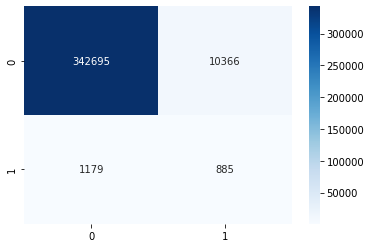

In [32]:
# fit model
model = XGBClassifier(n_estimators=50,subsample=0.5,max_depth=7,learning_rate=0.01,min_child_weight=0,
                            colsample_bytree=0.5,scale_pos_weight=100,eval_metric=['logloss','auc','error'],use_label_encoder=False)
model.fit(X_train, y_train)

# predict data
y_pred = model.predict(X_test)
print('Our MCC is: ', matthews_corrcoef(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,annot=True, cmap='Blues',fmt='g')

In [24]:
params = { 'n_estimators': [50,100,150],
           'subsample' :[0.5,0.7,1],
           'max_depth': [3,5,7,9],
           'learning_rate': [0.01, 0.05, 0.1],
           'min_child_weight':[0,5,15],
           'colsample_bytree': [0.5,0.7,1],
          'scale_pos_weight':[1,10,100]
         }

xgb_model = XGBClassifier(eval_metric=['logloss','auc','error'],use_label_encoder=False)

grid_search = GridSearchCV(estimator=xgb_model, 
                   param_grid=params,
                   scoring=make_scorer(matthews_corrcoef), 
                   n_jobs=-1,
                   verbose=3,
                    cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 150, 'scale_pos_weight': 1, 'subsample': 1}


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits  
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 150, 'scale_pos_weight': 1, 'subsample': 1}

### test

In [29]:
X = df_new.drop(['Id','Response'],axis=1)
y = df_new['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Our MCC is:  0.26967844258141294


<AxesSubplot:>

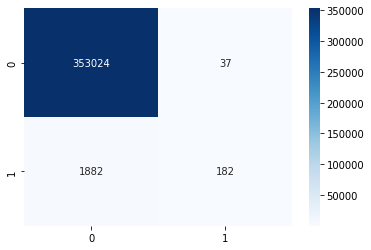

In [30]:
# fit model
model = XGBClassifier(n_estimators=150,subsample=1,max_depth=3,learning_rate=0.1,min_child_weight=5,
                        colsample_bytree=0.7,scale_pos_weight=1,eval_metric=['logloss','auc','error'],use_label_encoder=False)
model.fit(X_train, y_train)

# predict data
y_pred = model.predict(X_test)
print('Our MCC is: ', matthews_corrcoef(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat,annot=True, cmap='Blues',fmt='g')